In [10]:
from statsmodels.tsa.arima_process import ArmaProcess
import numpy as np
import matplotlib.pyplot as plt

In [11]:
# ArmaProcess로 모형 생성하고 nobs 만큼 샘플 생성
def gen_arma_samples (ar,ma,nobs):
    arma_model   = ArmaProcess(ar=ar, ma=ma)        # 모형 정의
    arma_samples = arma_model.generate_sample(nobs) # 샘플 생성
    return arma_samples

# drift가 있는 모형은 ArmaProcess에서 처리가 안 되어서 수동으로 정의해줘야 함
def gen_random_walk_w_drift(nobs,drift):
    init = np.random.normal(size=1, loc = 0)
    e = np.random.normal(size=nobs, scale =1)

    y = np.zeros(nobs)
    y[0] = init

    for t in range(1,nobs):
        y[t] = drift + 1 * y[t-1] + e[t]

    return y

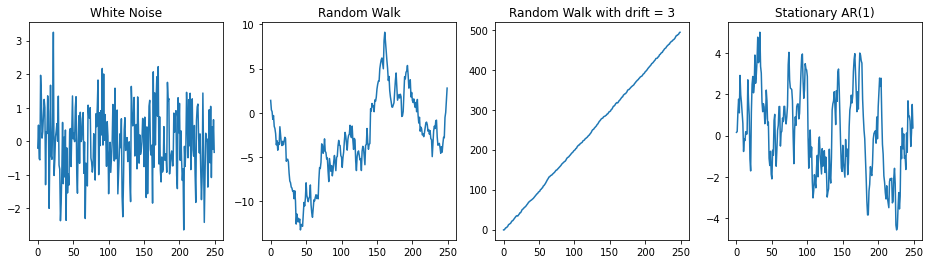

In [12]:
np.random.seed(12345)

white_noise         = gen_arma_samples(ar = [1], ma = [1], nobs = 250)       # y_t = epsilon_t
random_walk         = gen_arma_samples(ar = [1,-1], ma = [1], nobs = 250)    # (1 - L)y_t = epsilon_t
random_walk_w_drift = gen_random_walk_w_drift(250, 2)                      # y_t = 2 + y_{t-1} + epsilon_t
stationary_ar_1     = gen_arma_samples(ar = [1,-0.9], ma = [1],nobs=250)     # (1 - 0.9L) y_t = epsilon_t

fig,ax = plt.subplots(1,4)
ax[0].plot(white_noise)
ax[0].set_title("White Noise")

ax[1].plot(random_walk)
ax[1].set_title("Random Walk")

ax[2].plot(random_walk_w_drift)
ax[2].set_title("Random Walk with drift = 3")

ax[3].plot(stationary_ar_1)
ax[3].set_title("Stationary AR(1)")

fig.set_size_inches(16,4)

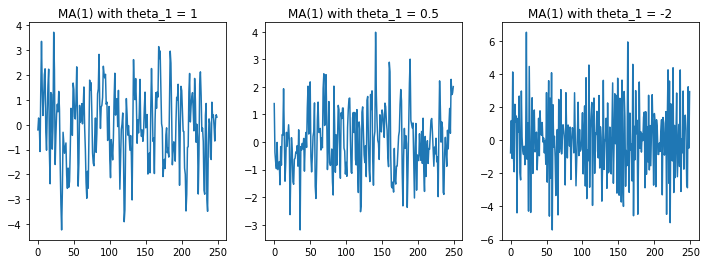

In [5]:
np.random.seed(12345)

ma_1  = gen_arma_samples(ar = [1], ma = [1,1], nobs = 250)       # y_t = (1+L) epsilon_t
ma_2  = gen_arma_samples(ar = [1], ma = [1,0.5], nobs = 250)       # y_t = (1+0.5L)epsilon_t
ma_3  = gen_arma_samples(ar = [1], ma = [1,-2], nobs = 250)       # y_t = (1-2L) epsilon_t

fig,ax = plt.subplots(1,3, figsize = (12,4))

ax[0].plot(ma_1)
ax[0].set_title("MA(1) with theta_1 = 1")

ax[1].plot(ma_2)
ax[1].set_title("MA(1) with theta_1 = 0.5")

ax[2].plot(ma_3)
ax[2].set_title("MA(1) with theta_1 = -2")
 
plt.show()

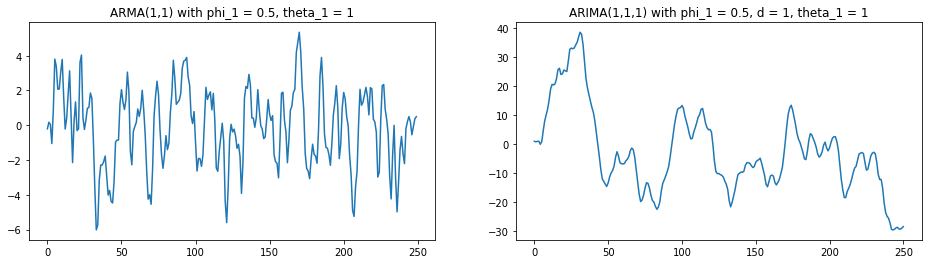

In [9]:
np.random.seed(12345)
from statsmodels.tsa.tsatools import unintegrate, unintegrate_levels


arma_1  = gen_arma_samples (ar = [1,-.5], ma = [1,1], nobs = 250) # 차분한 값이 ARMA (1,1)을 따름
arima_1 = unintegrate(arma_1, [1])                                # unintegrate: 차분한 값을 다시 원상 복귀

fig,ax = plt.subplots(1,2, figsize = (16,4))

ax[0].plot(arma_1)
ax[0].set_title("ARMA(1,1) with phi_1 = 0.5, theta_1 = 1")


ax[1].plot(arima_1)
ax[1].set_title("ARIMA(1,1,1) with phi_1 = 0.5, d = 1, theta_1 = 1")
plt.show()